In [1]:
"""
You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with 
diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables.
"""

'\nYou are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with \ndiabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:\n1. Pregnancies: Number of times pregnant (integer)\n2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)\n3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)\n4. SkinThickness: Triceps skin fold thickness (mm) (integer)\n5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)\n6. BMI: Body mass index (weight in kg/(height in m)^2) (float)\n7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes\nbased on family history) (float)\n8. Age: Age in years (integer)\n9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)\n\nYour goal is to create a decision tree to predict whether a patient has diabetes based on t

In [2]:
#Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships
#    between the variables.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

df=pd.read_csv('diabetes.csv')

# Descriptive Statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


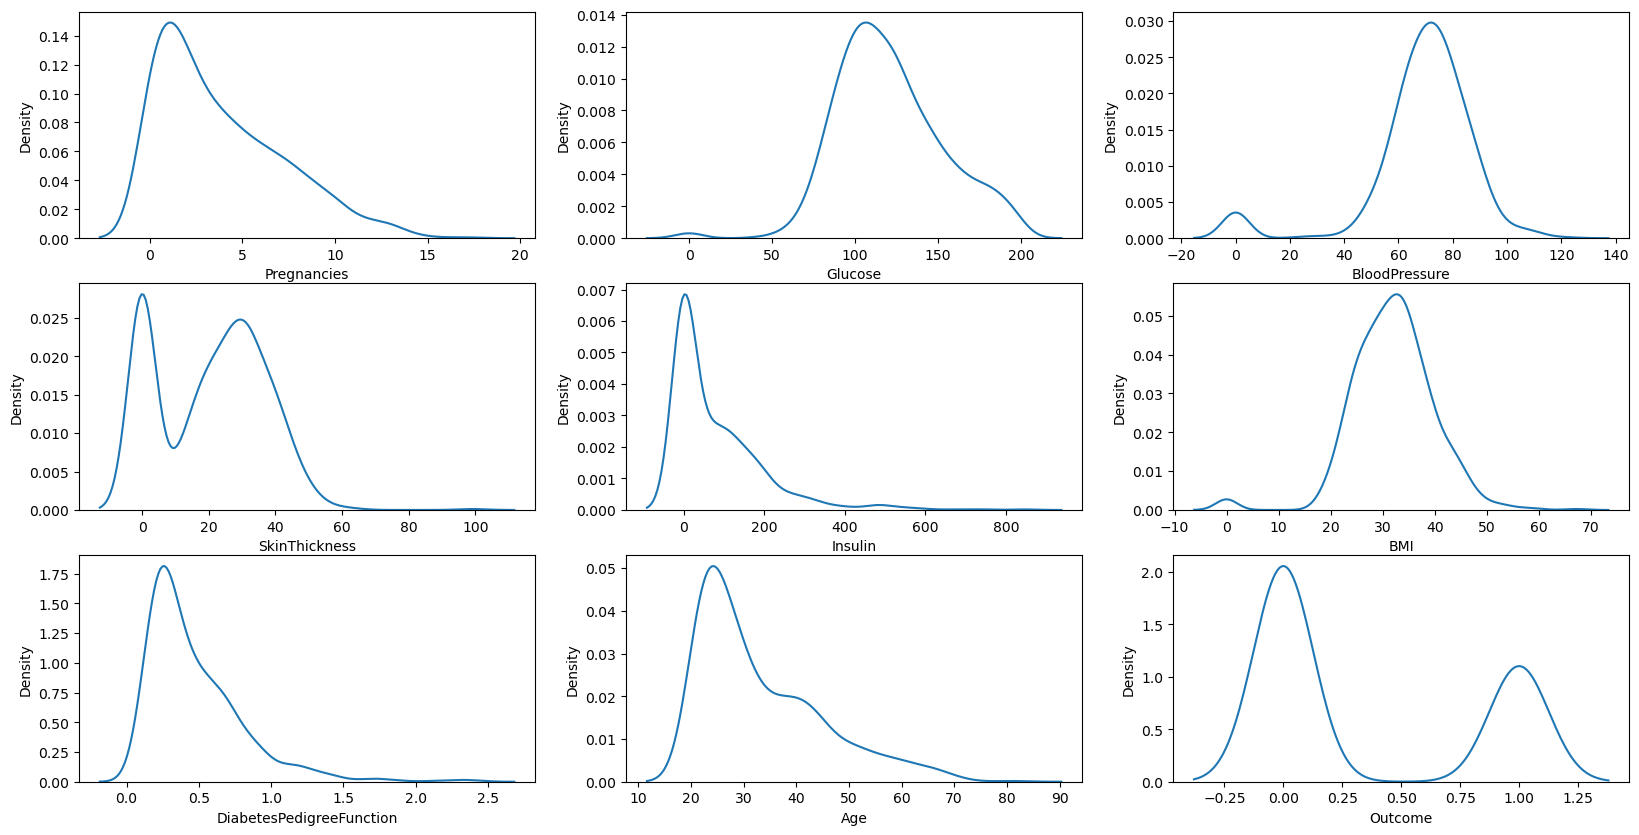

In [3]:
#distribution of different features

features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

fig,axis=plt.subplots(3,3,figsize=(20,10))
for i,j in enumerate(features):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data=df[j])
plt.show()

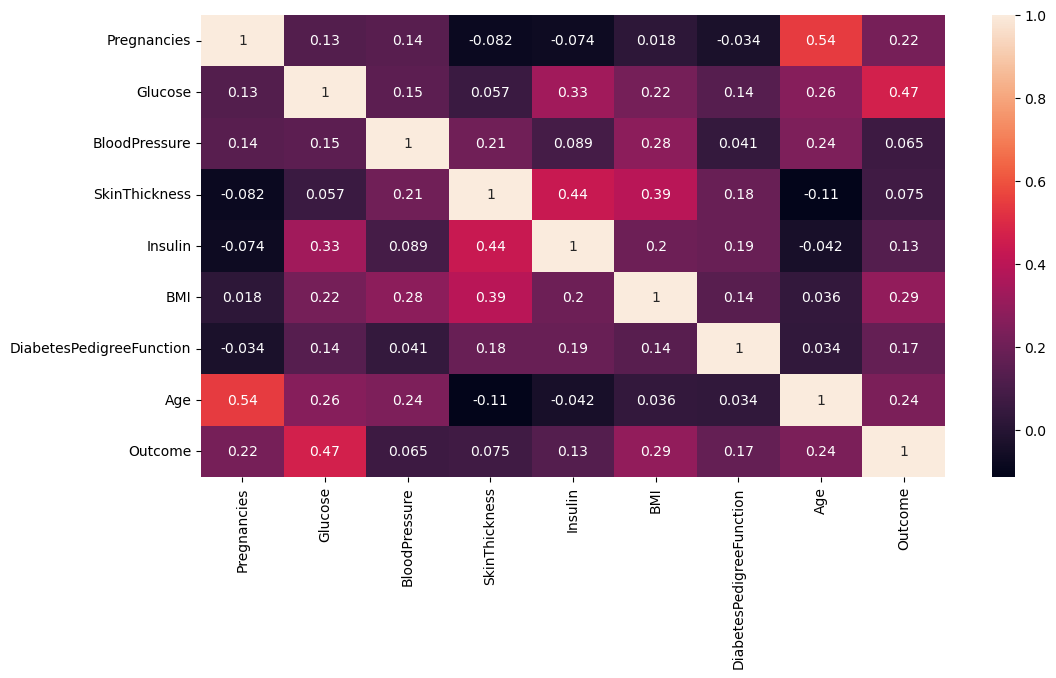

In [4]:
# Relationship between the variables

plt.figure(figsize=(12,6))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [5]:
#Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

df.isnull().sum()
""" THere is no mission value"""

' THere is no mission value'

In [6]:
#Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

x=df.iloc[:,:-1]
y=list(df['Outcome'])

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [25]:
#Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the 
#    hyperparameters and avoid overfitting.

#train decision tree model.

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',max_depth=4)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [8]:
#hypertuning

parameter = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(dtree,param_grid=parameter,cv=5)


In [9]:
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [13]:
#Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. 
#    Use confusion matrices and ROC curves to visualize the results.

y_pred=cv.predict(x_test)

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score,auc

print("Accuracy: ",round(accuracy_score(y_pred,y_test)*100,2),"%")
print(classification_report(y_test, y_pred))

Accuracy:  71.43 %
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       151
           1       0.57      0.75      0.65        80

    accuracy                           0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.75      0.71      0.72       231



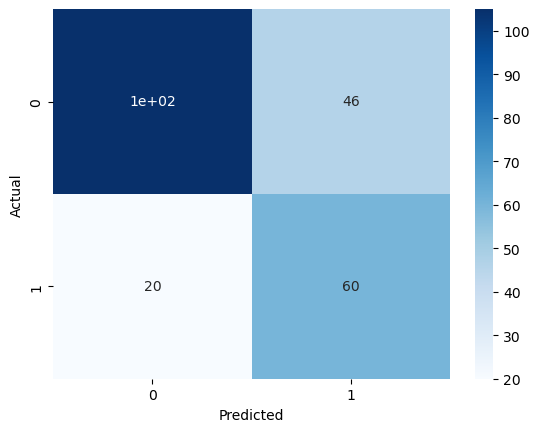

In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

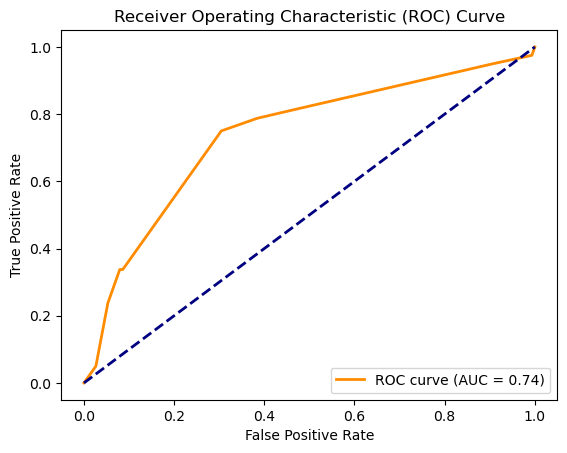

In [15]:
y_prob = cv.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [37]:
#Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. 
#    Use domain knowledge and common sense to explain the patterns and trends.

cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 4}

In [29]:
import numpy as np
importances = dtree.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 1 (0.580083)
2. feature 7 (0.201623)
3. feature 5 (0.173019)
4. feature 2 (0.036657)
5. feature 6 (0.008618)
6. feature 4 (0.000000)
7. feature 3 (0.000000)
8. feature 0 (0.000000)


In [43]:
#Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. 
#    Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

for depth in [1, 2, 3, 4,5,6,7,8,9]:
    dt_model = DecisionTreeClassifier(max_depth=depth)
    dt_model.fit(x_train, y_train)
    y_pred = dt_model.predict(x_test)
    accuracy = round(accuracy_score(y_test, y_pred)*100,2)
    print(f"Max depth = {depth}: Accuracy = {accuracy}%")

Max depth = 1: Accuracy = 71.86%
Max depth = 2: Accuracy = 71.86%
Max depth = 3: Accuracy = 71.86%
Max depth = 4: Accuracy = 70.56%
Max depth = 5: Accuracy = 75.32%
Max depth = 6: Accuracy = 69.7%
Max depth = 7: Accuracy = 68.83%
Max depth = 8: Accuracy = 71.43%
Max depth = 9: Accuracy = 71.43%
